# Sales Forcasting Using Prophet Model

## Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [9]:
df = pd.read_csv('stores.csv', encoding='latin1')  # also known as ISO-8859-1
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


## Exploratory Data Analysis (EDA)

In [10]:
df.shape  # Rows and columns

(2121, 21)

In [11]:
df.head()  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [12]:
df.info()  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [13]:
df.describe()  # Summary statistics for numeric columns

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [14]:
df.isnull().sum() #check missing value


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [15]:
df.duplicated().sum() # Check for duplicates


0

In [16]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category'] #Unique Values in Categorical Columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment: ['Consumer' 'Corporate' 'Home Office']
Country: ['United States']
Region: ['South' 'West' 'East' 'Central']
Category: ['Furniture']
Sub-Category: ['Bookcases' 'Chairs' 'Tables' 'Furnishings']


### Correlation Matrix for Numerical Columns

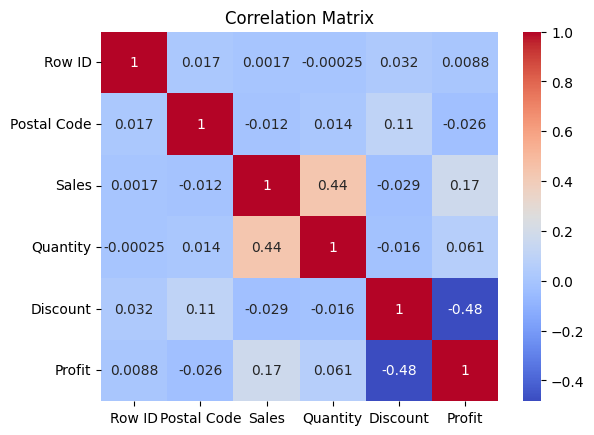

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Sales and Profit Distribution

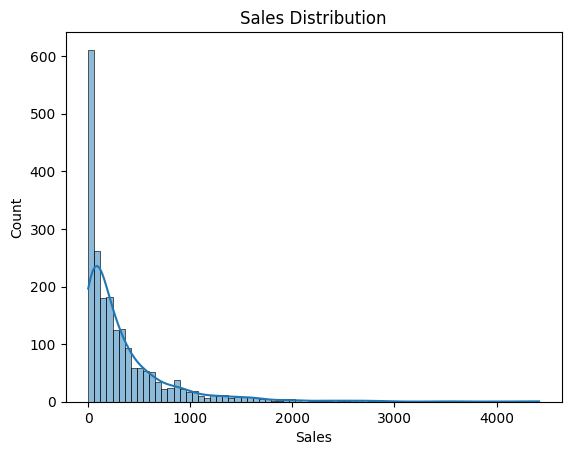

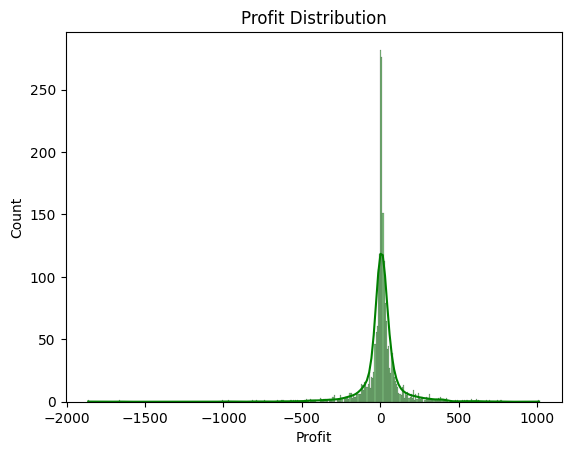

In [18]:
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

sns.histplot(df['Profit'], kde=True, color='green')
plt.title("Profit Distribution")
plt.show()


### Top Customers by Sales

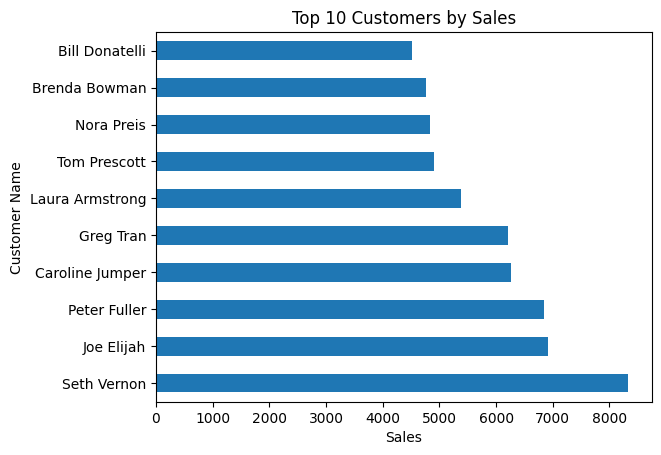

In [19]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.show()


In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [21]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Sales and Profit by Category 

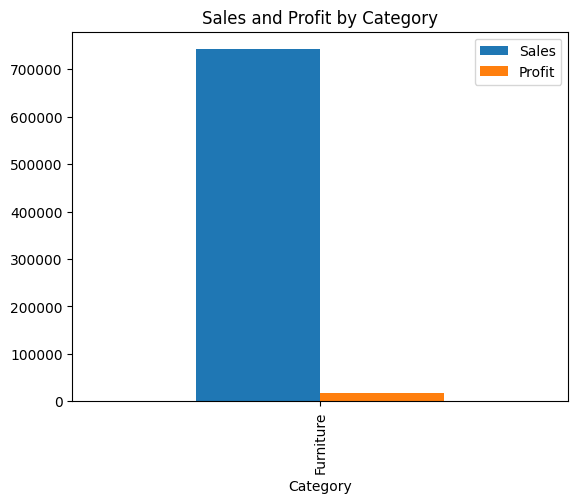

In [22]:
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_sales.plot(kind='bar', title='Sales and Profit by Category')
plt.show()




In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Sales and Profit by Sub-Category

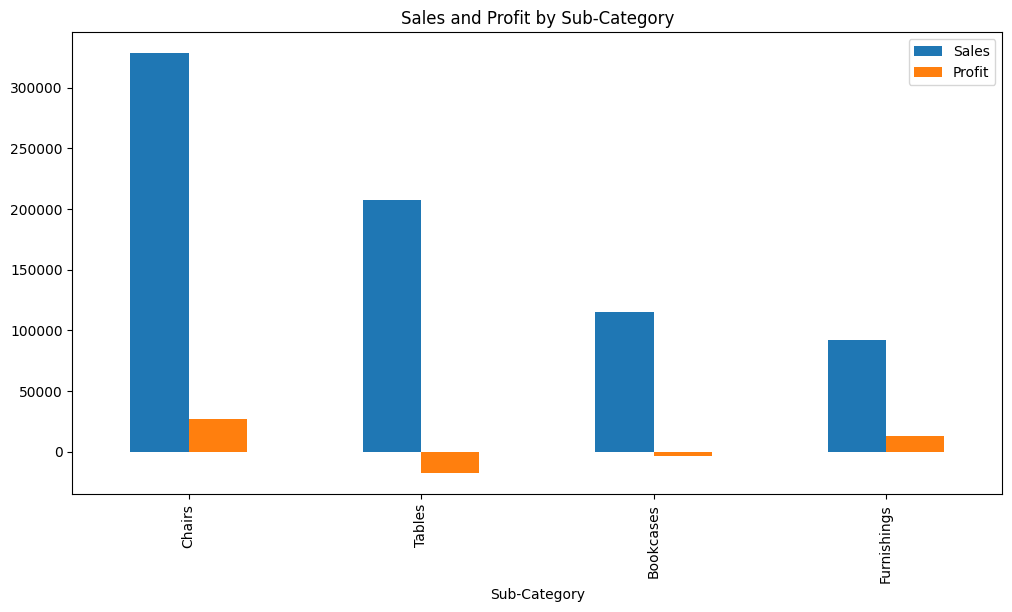

In [24]:
subcategory_sales = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
subcategory_sales.plot(kind='bar', figsize=(12,6), title='Sales and Profit by Sub-Category')
plt.show()

In [25]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

###  Ship Mode Analysis

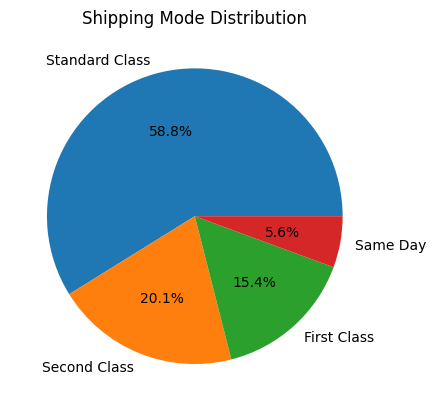

In [26]:
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Shipping Mode Distribution')
plt.ylabel('')
plt.show()


In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Time Series of Monthly Sales

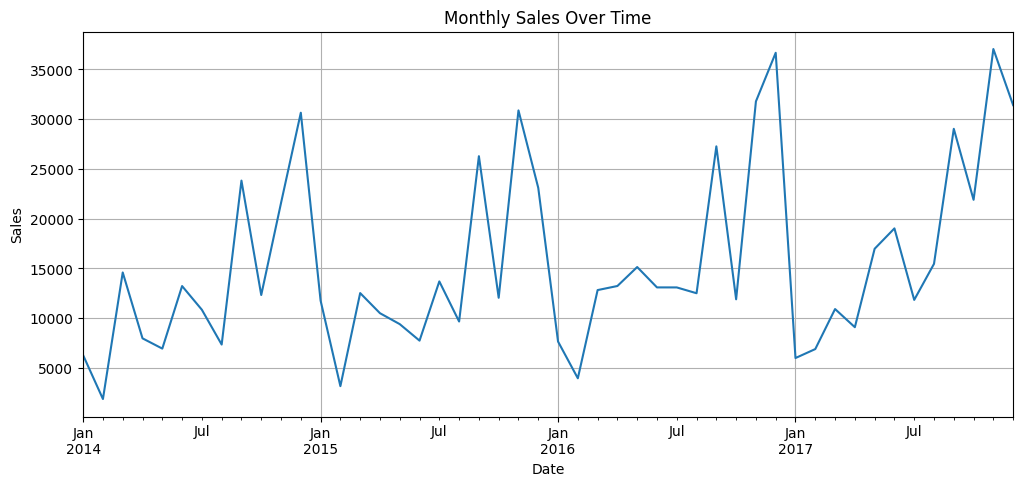

In [28]:
# 1. Ensure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 2. Drop rows where 'Order Date' couldn't be parsed (optional but safe)
df = df.dropna(subset=['Order Date'])

# 3. Set 'Order Date' as index
df = df.set_index('Order Date',drop=False)

# 4. Resample by Month and plot
monthly_sales = df['Sales'].resample('M').sum()

# 5. Plot
monthly_sales.plot(title='Monthly Sales Over Time', figsize=(12, 5))
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()



In [29]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Profit vs Discount

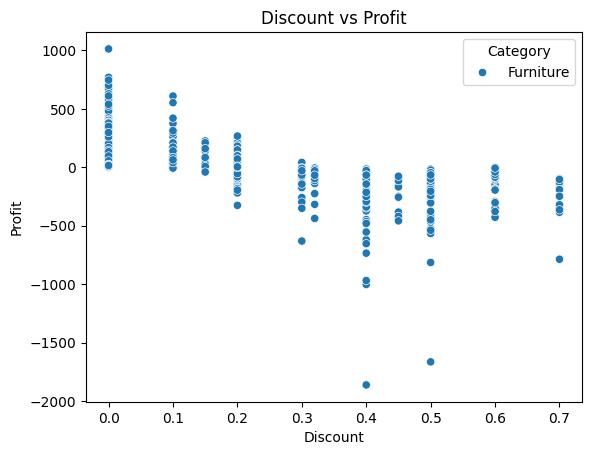

In [30]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()


###  Product Name with the Highest Total Sales

In [31]:
top_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(1)
print("Top-selling product:\n", top_product)


Top-selling product:
 Product Name
HON 5400 Series Task Chairs for Big and Tall    21870.576
Name: Sales, dtype: float64


### Top 10 Most Profitable Products

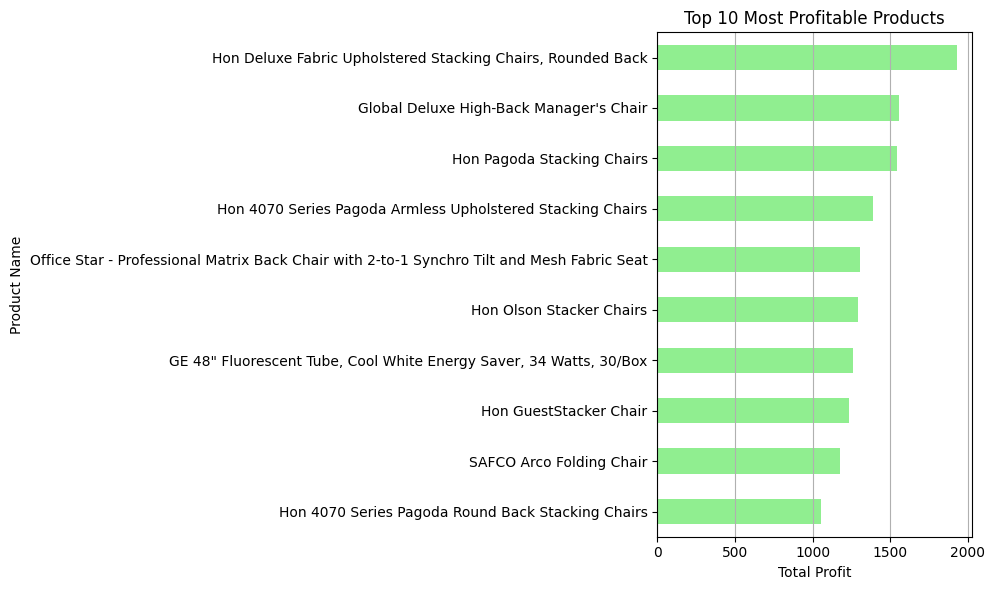

In [32]:
# Group by Product Name and sum Profit
profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Plot
profit_products.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  # Highest profit at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [33]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Data Wrangling

In [34]:
df.isnull().sum() # check for null value


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Remove Duplicates

In [35]:
df.duplicated().sum()



0

In [36]:
df.dtypes # cheack datatypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### order date and ship date convert to datetime

In [37]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Drop Row ID Column

In [40]:
df.drop('Row ID', axis=1, inplace=True)


### visulize outliers using boxplot

<Axes: ylabel='Sales'>

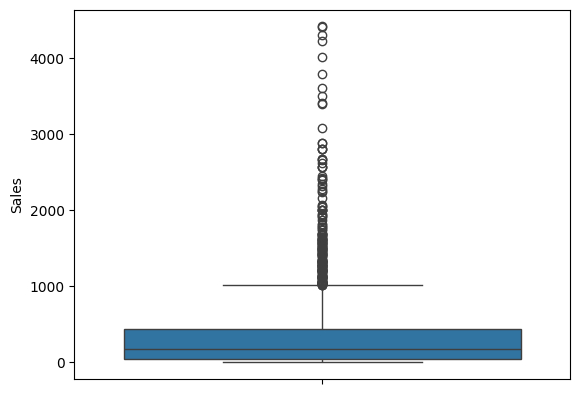

In [41]:
sns.boxplot(data= df,y=df['Sales']) # Boxplot for Sales

<Axes: ylabel='Profit'>

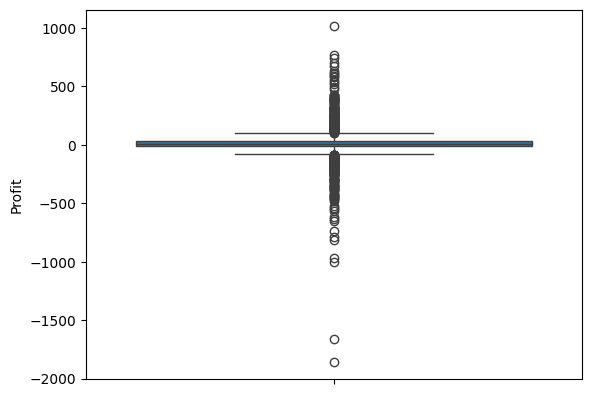

In [42]:
sns.boxplot(data= df,y=df['Profit']) # Boxplot for Profit

### remove Outliers using IQR method

In [43]:
# Step 1: Calculate Q1 and Q3
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame
df_no_outliers = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

<Axes: ylabel='Sales'>

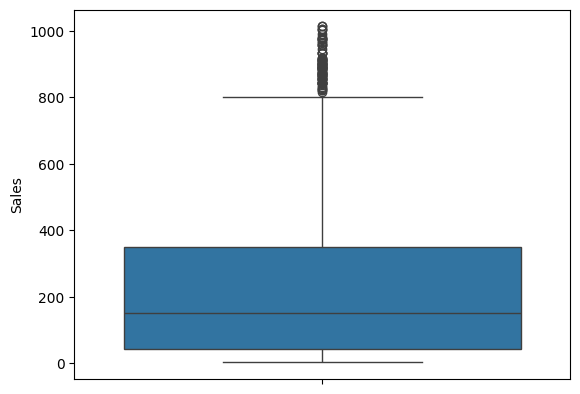

In [44]:
sns.boxplot(data= df_no_outliers,y=df_no_outliers['Sales']) # Boxplot for Sales

In [45]:
# Step 1: Calculate Q1 and Q3
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame
df_no_outliers1 = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

<Axes: ylabel='Profit'>

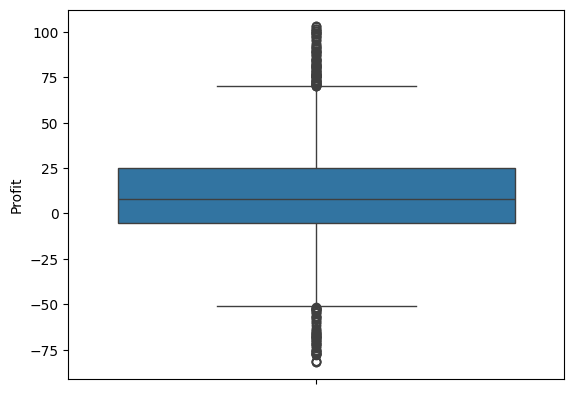

In [46]:
sns.boxplot(data= df_no_outliers1,y=df_no_outliers1['Profit']) # Boxplot for Sales

#### Summaray
all outliers is not removed using   IQR Method


### Modified Z-Score method for outliers removel

In [47]:
from numpy import median

median_sales = median(df['Sales'])
mad = median(abs(df['Sales'] - median_sales))
modified_z = 0.6745 * (df['Sales'] - median_sales) / mad

df_mz = df[abs(modified_z) <= 3.5]






<Axes: ylabel='Sales'>

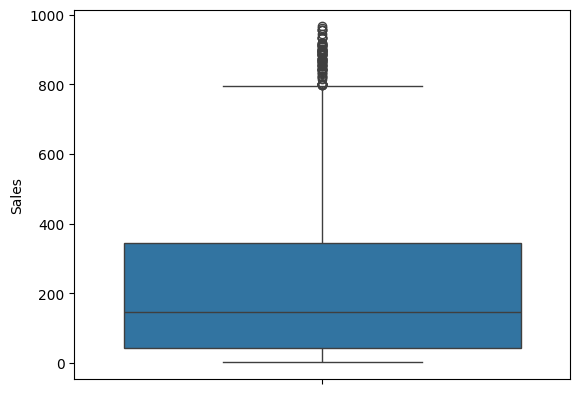

In [48]:
sns.boxplot(data= df_mz,y=df_mz['Sales']) # Boxplot for Sales after modified z-score filtering

In [49]:
from numpy import median

median_sales = median(df['Profit'])
mad = median(abs(df['Profit'] - median_sales))
modified_z = 0.6745 * (df['Profit'] - median_sales) / mad

df_mf = df[abs(modified_z) <= 3.5]

<Axes: ylabel='Profit'>

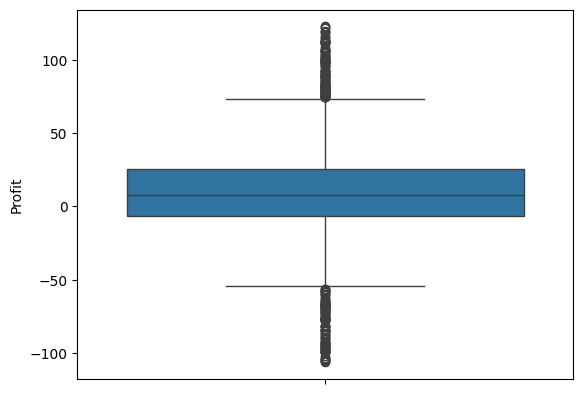

In [50]:
sns.boxplot(data= df_mf,y=df_mf['Profit']) # Boxplot for Sales after modified z-score filtering

#### Summary
ouliers Complete is not removed through Modified z-score

### Manual Method for outliers removal

In [51]:
# Manually filter out extreme profit values
df = df[(df['Profit'] >= -31) & (df['Profit'] <= 47)]

<Axes: ylabel='Profit'>

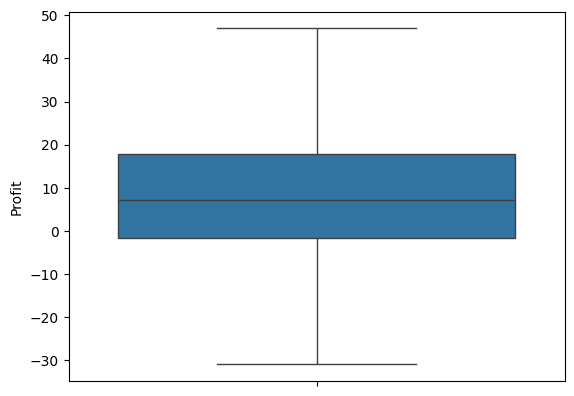

In [52]:
sns.boxplot(data= df,y=df['Profit']) # Show boxplot of Profit after Manual Method

<Axes: ylabel='Sales'>

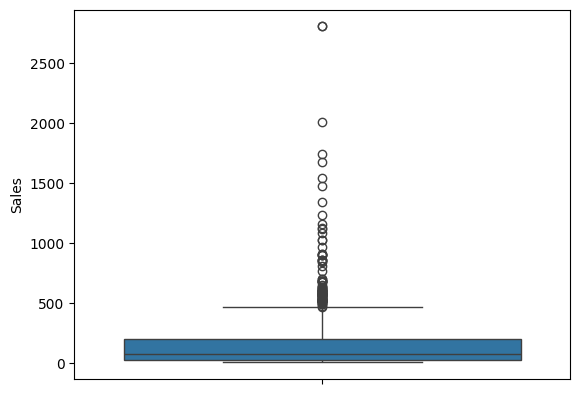

In [53]:
sns.boxplot(data= df,y=df['Sales'])

In [54]:
# Manually filter out extreme Sales values
df1 = df[(df['Sales'] >= 0) & (df['Sales'] <= 279)]
df1 = df1.copy()  # 🔁 Add this line
df1['Sales'] = np.log1p(df1['Sales'])  # safe assignment now


<Axes: ylabel='Sales'>

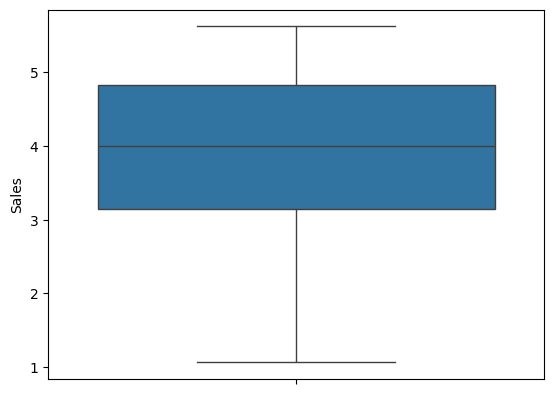

In [55]:
sns.boxplot(data= df1,y=df1['Sales']) # Show boxplot of Sales after Manual Method

In [56]:
df1.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,5.572002,2,0.0,41.9136
2014-06-09,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,3.909219,7,0.0,14.1694
2017-07-16,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",4.281819,2,0.3,-1.0196
2015-09-17,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",4.829912,3,0.2,15.5250
2015-12-27,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",5.361564,3,0.3,-15.1470


## Apply Prophet Model

### Prepare the Data And Apply Prophet Model

In [57]:
from prophet import Prophet

# Step 2: Aggregate Monthly Sales
df_monthly = df1.resample('M', on='Ship Date')['Sales'].sum().reset_index()
df_monthly = df_monthly.rename(columns={'Ship Date': 'ds', 'Sales': 'y'})

# Step 3: Smooth Sales to reduce noise (rolling mean)
df_monthly['y'] = df_monthly['y'].rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Optional: Log transformation (comment this out if you don't want log)
log_transform = True
if log_transform:
    df_monthly['y'] = np.log1p(df_monthly['y'])
    
# Step 4: Define and Tune Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    changepoint_prior_scale=0.5,       # control trend flexibility
    seasonality_prior_scale=20         # control seasonality flexibility
)
# Optional: Add custom quarterly seasonality
model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Step 5: Fit Model
model.fit(df_monthly)

# Step 6: Forecast Next 3 Months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)

# Revert log if used
if log_transform:
    df_monthly['y'] = np.expm1(df_monthly['y'])
    forecast['yhat'] = np.expm1(forecast['yhat'])




19:17:54 - cmdstanpy - INFO - Chain [1] start processing
19:18:19 - cmdstanpy - INFO - Chain [1] done processing


# Show Result Using Potly

In [58]:
# Step 7: Plot Results
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly['ds'], y=df_monthly['y'],
                         mode='lines', name='Actual Sales', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Predicted Sales', line=dict(color='red')))
fig.update_layout(title='Improved Monthly Sales Forecast using Prophet',
                  xaxis_title='Date', yaxis_title='Sales', template='plotly_white')
fig.show()

In [59]:
import joblib

# Save the trained Prophet model
joblib.dump(model, 'salesforecast.pkl')




['sales_forecast_model.pkl']

### all code Prophet Model

In [60]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

# Step 2: Aggregate Monthly Sales
df_monthly = df1.resample('M', on='Ship Date')['Sales'].sum().reset_index()
df_monthly = df_monthly.rename(columns={'Ship Date': 'ds', 'Sales': 'y'})

# Step 3: Smooth Sales to reduce noise (rolling mean)
df_monthly['y'] = df_monthly['y'].rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Optional: Log transformation (comment this out if you don't want log)
log_transform = True
if log_transform:
    df_monthly['y'] = np.log1p(df_monthly['y'])

# Step 4: Define and Tune Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    changepoint_prior_scale=0.5,       # control trend flexibility
    seasonality_prior_scale=20         # control seasonality flexibility
)

# Optional: Add custom quarterly seasonality
model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Step 5: Fit Model
model.fit(df_monthly)

# Step 6: Forecast Next 12 Months
future = model.make_future_dataframe(periods=7, freq='M')
forecast = model.predict(future)

# Revert log if used
if log_transform:
    df_monthly['y'] = np.expm1(df_monthly['y'])
    forecast['yhat'] = np.expm1(forecast['yhat'])

# Step 7: Plot Results
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly['ds'], y=df_monthly['y'],
                         mode='lines', name='Actual Sales', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Predicted Sales', line=dict(color='red')))
fig.update_layout(title='Improved Monthly Sales Forecast using Prophet',
                  xaxis_title='Date', yaxis_title='Sales', template='plotly_white')
fig.show()



19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:38 - cmdstanpy - INFO - Chain [1] done processing


## Evaluate Performance Metrics

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# 📦 Import evaluation metrics from scikit-learn to measure model accuracy

# 🔀 Merge actual data with Prophet's forecast on the 'ds' (date) column
merged = pd.merge(df_monthly, forecast, on='ds', how='inner')

# 🔽 Keep only actual ('y') and predicted ('yhat') columns, and remove any inf or NaN values
merged = merged[['y', 'yhat']].replace([np.inf, -np.inf], np.nan).dropna()

# 🎯 Define true values (actuals) and predicted values as numpy arrays
y_true = merged['y'].values
y_pred = merged['yhat'].values

# 🧮 Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)     # Mean Absolute Error: average absolute difference
mse = mean_squared_error(y_true, y_pred)      # Mean Squared Error: average squared difference
rmse = np.sqrt(mse)                           # Root Mean Squared Error: square root of MSE
mape = mean_absolute_percentage_error(y_true, y_pred)  # Mean Absolute Percentage Error

# 🖨️ Print results with formatting to 2 decimal places
print("\n--- Prophet Model Accuracy on Historical Data ---")
print(f"MAE  = {mae:.2f}")      # Example: MAE  = 25.47
print(f"MSE  = {mse:.2f}")      # Example: MSE  = 823.50
print(f"RMSE = {rmse:.2f}")     # Example: RMSE = 28.69
print(f"MAPE = {mape * 100:.2f}%")  # Convert MAPE to percentage (e.g., 5.2%)






--- Prophet Model Accuracy on Historical Data ---
MAE  = 2.13
MSE  = 8.25
RMSE = 2.87
MAPE = 2.08%


### ✅ Prophet Model Accuracy Summary (Historical Data)

| Metric | Value | Description |
|--------|--------|-------------|
| **MAE**  | `2.13`  | Mean Absolute Error – average absolute difference between predicted and actual values |
| **MSE**  | `8.25`  | Mean Squared Error – average squared difference (penalizes larger errors more) |
| **RMSE** | `2.87`  | Root Mean Squared Error – square root of MSE, interpretable in original units |
| **MAPE** | `2.08%` | Mean Absolute Percentage Error – average percentage error, great for comparing model accuracy |

**🔍 Interpretation:**
- The model performs well with low error rates.
- The `MAPE` of 2.08% indicates high forecasting accuracy.
- Suitable for short-term forecasting and trend analysis.

---



## Prophet Cross-Validation

In [265]:
from prophet.diagnostics import cross_validation, performance_metrics


In [266]:
# Parameters:
# initial: size of the training set (e.g., 730 days ~ 2 years)
# period: spacing between cutoff dates (e.g., 180 days ~ 6 months)
# horizon: forecast length for evaluation (e.g., 90 days ~ 3 months)

df_cv = cross_validation(
    model,
    initial='730 days',
    period='180 days',
    horizon='90 days',
    parallel="processes"  # speeds up with multicore
)


### Evaluate Performance Metrics

In [ ]:
df_p = performance_metrics(df_cv)
print(df_p.head())


In [64]:
df1.to_csv('preprocessdata.csv', index=False)


### Test The Save Model and PreProcess Data

In [68]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
df=pd.read_csv('preprocessdata.csv', encoding='latin1')  # also known as ISO-8859-1
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Step 2: Aggregate Monthly Sales
df_monthly = df.resample('M', on='Ship Date')['Sales'].sum().reset_index()
df_monthly = df_monthly.rename(columns={'Ship Date': 'ds', 'Sales': 'y'})

# Step 3: Smooth Sales to reduce noise (rolling mean)
df_monthly['y'] = df_monthly['y'].rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Optional: Log transformation (comment this out if you don't want log)
log_transform = True
if log_transform:
    df_monthly['y'] = np.log1p(df_monthly['y'])

# Step 4: Define and Tune Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    changepoint_prior_scale=0.5,       # control trend flexibility
    seasonality_prior_scale=20         # control seasonality flexibility
)

# Optional: Add custom quarterly seasonality
model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Step 5: Fit Model
model.fit(df_monthly)

# Step 6: Forecast Next 12 Months
future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)

# Revert log if used
if log_transform:
    df_monthly['y'] = np.expm1(df_monthly['y'])
    forecast['yhat'] = np.expm1(forecast['yhat'])

# Step 7: Plot Results
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly['ds'], y=df_monthly['y'],
                         mode='lines', name='Actual Sales', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Predicted Sales', line=dict(color='red')))
fig.update_layout(title='Improved Monthly Sales Forecast using Prophet',
                  xaxis_title='Date', yaxis_title='Sales', template='plotly_white')
fig.show()

19:26:58 - cmdstanpy - INFO - Chain [1] start processing
19:27:08 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objs as go
import plotly.io as pio
import joblib
import os

# 2. Load and preprocess data
df = pd.read_csv('preprocessdata.csv', encoding='ISO-8859-1')

# Convert Ship Date to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Resample monthly sales
df_monthly = df.resample('M', on='Ship Date')['Sales'].sum().reset_index()
df_monthly = df_monthly.rename(columns={'Ship Date': 'ds', 'Sales': 'y'})
original_values = df_monthly['y'].copy()  # Save original

# 3. Apply rolling average smoothing
df_monthly['y'] = df_monthly['y'].rolling(window=3, center=True).mean()
df_monthly['y'] = df_monthly['y'].fillna(method='bfill').fillna(method='ffill')

# 4. Log transform
log_transform = True
if log_transform:
    df_monthly['y'] = np.log1p(df_monthly['y'])

# 5. Load trained model
model_path = 'salesforecast.pkl'
if not os.path.exists(model_path):
    raise FileNotFoundError("Model not found. Please train and save it as 'salesforecast.pkl'.")
model = joblib.load(model_path)

# 6. Forecast future
periods = 12  # Months to forecast
future = model.make_future_dataframe(periods=periods, freq='M')
forecast = model.predict(future)

# 7. Inverse transform predictions
if log_transform:
    forecast['yhat'] = np.expm1(forecast['yhat'])
    if 'yhat_lower' in forecast.columns:
        forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
        forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

# 8. Plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly['ds'], y=np.expm1(df_monthly['y']) if log_transform else df_monthly['y'],
                         mode='lines', name='Actual Sales', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Predicted Sales', line=dict(color='red')))
fig.update_layout(title='Sales Forecast using Prophet',
                  xaxis_title='Date', yaxis_title='Sales',
                  template='plotly_white')
fig.show()

# 9. Show forecast table
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods)
forecast_data = forecast_data.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Sales',
    'yhat_lower': 'Lower Bound',
    'yhat_upper': 'Upper Bound'
})
forecast_data[['Predicted Sales', 'Lower Bound', 'Upper Bound']] = \
    forecast_data[['Predicted Sales', 'Lower Bound', 'Upper Bound']].round(2)

forecast_data


,Date,Predicted Sales,Lower Bound,Upper Bound
49,2018-02-28,73.37,70.35,76.18
50,2018-03-31,86.89,81.14,92.62
51,2018-04-30,118.82,105.36,132.82
52,2018-05-31,120.01,99.37,143.93
53,2018-06-30,130.08,99.47,168.91
54,2018-07-31,123.81,87.77,175.86
55,2018-08-31,170.72,110.03,265.40
56,2018-09-30,155.38,90.44,266.68
57,2018-10-31,191.82,97.16,362.38
58,2018-11-30,213.94,96.31,450.84
